<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Deep-mutational-scanning-of-Perth/2009-(H3N2)-HA" data-toc-modified-id="Deep-mutational-scanning-of-Perth/2009-(H3N2)-HA-1">Deep mutational scanning of Perth/2009 (H3N2) HA</a></span><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1.1">Overview</a></span></li><li><span><a href="#Experimental-summary" data-toc-modified-id="Experimental-summary-1.2">Experimental summary</a></span></li><li><span><a href="#Goals" data-toc-modified-id="Goals-1.3">Goals</a></span></li></ul></li><li><span><a href="#Import-modules,-define-directories" data-toc-modified-id="Import-modules,-define-directories-2">Import modules, define directories</a></span></li><li><span><a href="#Estimate-H3-HA-site-specific-amino-acid-preferences" data-toc-modified-id="Estimate-H3-HA-site-specific-amino-acid-preferences-3">Estimate H3 HA site-specific amino-acid preferences</a></span><ul class="toc-item"><li><span><a href="#Define-the-samples" data-toc-modified-id="Define-the-samples-3.1">Define the samples</a></span></li><li><span><a href="#Download-FASTQ-files-from-the-SRA" data-toc-modified-id="Download-FASTQ-files-from-the-SRA-3.2">Download <code>FASTQ</code> files from the SRA</a></span></li><li><span><a href="#Align-deep-sequencing-data-and-count-mutations" data-toc-modified-id="Align-deep-sequencing-data-and-count-mutations-3.3">Align deep sequencing data and count mutations</a></span></li><li><span><a href="#Estimate-the-site-specific-amino-acid-preferences" data-toc-modified-id="Estimate-the-site-specific-amino-acid-preferences-3.4">Estimate the site-specific amino-acid preferences</a></span></li><li><span><a href="#Renumber-preferences-to-H3-numbering-and-average-across-replicates" data-toc-modified-id="Renumber-preferences-to-H3-numbering-and-average-across-replicates-3.5">Renumber preferences to H3 numbering and average across replicates</a></span></li></ul></li><li><span><a href="#Fit-preferences-to-the-evolution-of-natural-H3-sequences" data-toc-modified-id="Fit-preferences-to-the-evolution-of-natural-H3-sequences-4">Fit preferences to the evolution of natural H3 sequences</a></span><ul class="toc-item"><li><span><a href="#Display-preferences-as-a-rescaled-logoplot" data-toc-modified-id="Display-preferences-as-a-rescaled-logoplot-4.1">Display preferences as a rescaled logoplot</a></span></li><li><span><a href="#Re-scale-the-preferences" data-toc-modified-id="Re-scale-the-preferences-4.2">Re-scale the preferences</a></span><ul class="toc-item"><li><span><a href="#Estimate-and-visualize-differential-preferences" data-toc-modified-id="Estimate-and-visualize-differential-preferences-4.2.1">Estimate and visualize differential preferences</a></span></li></ul></li><li><span><a href="#Calculate-the-site-entropy-and-write-to-a-new-preferences-file" data-toc-modified-id="Calculate-the-site-entropy-and-write-to-a-new-preferences-file-4.3">Calculate the site entropy and write to a new preferences file</a></span></li></ul></li><li><span><a href="#Compare-the-preferences-between-the-HA-homologs" data-toc-modified-id="Compare-the-preferences-between-the-HA-homologs-5">Compare the preferences between the HA homologs</a></span><ul class="toc-item"><li><span><a href="#Correlate-the-Perth/2009-H3-and-WSN/1933-H1-preferences" data-toc-modified-id="Correlate-the-Perth/2009-H3-and-WSN/1933-H1-preferences-5.1">Correlate the Perth/2009 H3 and WSN/1933 H1 preferences</a></span></li><li><span><a href="#Compute-the-distances-between-preferences" data-toc-modified-id="Compute-the-distances-between-preferences-5.2">Compute the distances between preferences</a></span></li><li><span><a href="#Examine-mutational-shifts-at-different-domains-and-sites" data-toc-modified-id="Examine-mutational-shifts-at-different-domains-and-sites-5.3">Examine mutational shifts at different domains and sites</a></span></li><li><span><a href="#Compare-the-entropies-between-the-head-and-stalk-domains-for-H1-and-H3" data-toc-modified-id="Compare-the-entropies-between-the-head-and-stalk-domains-for-H1-and-H3-5.4">Compare the entropies between the head and stalk domains for H1 and H3</a></span></li></ul></li></ul></div>

# Deep mutational scanning of Perth/2009 (H3N2) HA

## Overview

We performed deep mutational scanning of **hemagglutinin (HA)** from the **A/Perth/16/2009(H3N2)** influenza virus strain. This is analysis of the data generated from the DMS experiments using the [`dms_tools2`](https://github.com/jbloomlab/dms_tools2) software.

The reference for this study in [Lee et al (2018)](https://doi.org/10.1101/298364).

## Experimental summary

The goal of these experiments was to measure the effect of all single amino-acid mutations to HA on viral growth in cell culture. We created triplicate codon-mutant libraries of the Perth/2009 H3 HA, rescued virus libraries using the helper virus approach described in [Doud and Bloom (2016)](http://www.mdpi.com/1999-4915/8/6/155), and passaged the generated mutant virus libraries at low multiplicity of infection (MOI) in cell culture to select for functional variants of HA.

For each library, there is a _mutDNA-#_ sample representing the plasmid mutant library, and a _mutvirus-#_ sample representing the mutant viruses after passaging. Note that library 3 was passaged in technical replicate, so there are two _mutvirus_ samples (_3-1_ and _3-2_) for library 3. There is also a single set of wild-type controls for the unmutated plasmid and the corresponding virus, referred to as _wtDNA_ and _wtvirus_.

As described previously, all of the plasmid and virus samples were deep sequenced using a [barcoded-subamplicon sequencing](https://jbloomlab.github.io/dms_tools2/bcsubamp.html#bcsubamp) approach to sequence the samples to high accuracy.

## Goals

In this analysis, we will try to achieve the following goals:
1. Estimate the site-specific amino-acid preferences for the Perth/2009 H3 HA and use these preferences to fit an experimentally-informed codon substitution model on natural H3 sequences.
2. Investigate the extent of mutational shifts between two diverged HA homologs.

# Import modules, define directories

In [1]:
import os
import re
import glob
import itertools
import random
import pandas as pd
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import collections
import joypy
import statsmodels.stats.multitest
from collections import defaultdict

import dms_tools2
import dms_tools2.sra
import dms_tools2.plot
import dms_tools2.prefs
import dms_tools2.compareprefs
import dms_tools2.dssp
from dms_tools2.ipython_utils import showPDF
import warnings
warnings.simplefilter('ignore') # don't print warnings to avoid clutter in notebook
from IPython.display import display, HTML, Markdown
# from pymodules.utils import * # custom modules for this analysis

print("Using dms_tools2 version {0}".format(dms_tools2.__version__))

# CPUs to use, should not exceed the number you request with slurm
ncpus = 14

# do we use existing results or generate everything new?
use_existing = 'yes'

inputdir = './data/'

resultsdir = './results/'
fastqdir = os.path.join(resultsdir, 'FASTQ_files/')
countsdir = os.path.join(resultsdir, 'codoncounts/')
prefsdir = os.path.join(resultsdir, 'preferences/')
renumberedprefsdir = os.path.join(resultsdir, 'H3renumberedprefs/')
phydmsdir = os.path.join(resultsdir, 'phydms_analysis/')
logodir = os.path.join(resultsdir, 'logoplots/')
WSNprefsdir = os.path.join(resultsdir, 'WSNpreferences/')
prefsdistdir = os.path.join(resultsdir, 'prefsdist/')
plotsdir = os.path.join(resultsdir, 'plots/')

for xdir in [resultsdir, fastqdir, countsdir, prefsdir, renumberedprefsdir,
             phydmsdir, WSNprefsdir, prefsdistdir, plotsdir]:
    if not os.path.isdir(xdir):
        os.mkdir(xdir)

Using dms_tools2 version 2.2.dev8


# Estimate H3 HA site-specific amino-acid preferences

## Define the samples

Here we will create a `pandas` dataframe to define the samples with the following information:
1. The **name** of each sample.
2. The SRA run accession for the deep sequencing data.

In [2]:
samples = pd.DataFrame.from_records(
        [('mutDNA-1', 'SRR6364210'),
         ('mutDNA-2', 'SRR6364209'),
         ('mutDNA-3', 'SRR6364212'),
         ('mutvirus-1', 'SRR6364216'),
         ('mutvirus-2', 'SRR6364215'),
         ('mutvirus-3-1', 'SRR6364211'),
         ('mutvirus-3-2', 'SRR6364208'),
         ('wtDNA', 'SRR6364214'),
         ('wtvirus', 'SRR6364213')],
        columns=['name', 'run']
        )

## Download `FASTQ` files from the SRA

All of the FASTQ files are on the Sequence Read Archive (SRA) under the run numbers listed in the `samples` dataframe defined above. To download these files, we just pass that dataframe to the [dms_tools2.sra.fastqFromSRA](https://jbloomlab.github.io/dms_tools2/dms_tools2.sra.html#dms_tools2.sra.fastqFromSRA) function. Note that this requires the `fastq-dump` and `aspera` programs to be installed on the computer you are using at the specified paths.

In [3]:
print('Downloading FASTQ files from the SRA...')
dms_tools2.sra.fastqFromSRA(
        samples=samples,
        fastq_dump='fastq-dump', # valid path to this program on the Hutch server
        fastqdir=fastqdir,
        aspera=(
            '/app/aspera-connect/3.5.1/bin/ascp', # valid path to ascp on Hutch server
            '/app/aspera-connect/3.5.1/etc/asperaweb_id_dsa.openssh' # Aspera key on Hutch server
            ),
        overwrite={'no':True, 'yes':False}[use_existing],
        )
print('Completed download of FASTQ files from the SRA')

print('Here are the names of the downloaded files now found in {0}'.format(fastqdir))
display(HTML(samples.to_html(index=False)))

Completed download of FASTQ files from the SRA
Here are the names of the downloaded files now found in ./results/FASTQ_files/


name,run,R1,R2
mutDNA-1,SRR6364210,mutDNA-1_R1.fastq.gz,mutDNA-1_R2.fastq.gz
mutDNA-2,SRR6364209,mutDNA-2_R1.fastq.gz,mutDNA-2_R2.fastq.gz
mutDNA-3,SRR6364212,mutDNA-3_R1.fastq.gz,mutDNA-3_R2.fastq.gz
mutvirus-1,SRR6364216,mutvirus-1_R1.fastq.gz,mutvirus-1_R2.fastq.gz
mutvirus-2,SRR6364215,mutvirus-2_R1.fastq.gz,mutvirus-2_R2.fastq.gz
mutvirus-3-1,SRR6364211,mutvirus-3-1_R1.fastq.gz,mutvirus-3-1_R2.fastq.gz
mutvirus-3-2,SRR6364208,mutvirus-3-2_R1.fastq.gz,mutvirus-3-2_R2.fastq.gz
wtDNA,SRR6364214,wtDNA_R1.fastq.gz,wtDNA_R2.fastq.gz
wtvirus,SRR6364213,wtvirus_R1.fastq.gz,wtvirus_R2.fastq.gz


## Align deep sequencing data and count mutations

We have employed a barcoded-subamplicon sequencing approach to deep sequence the samples to high accuracy. We will now analyze the sequence data using the `dms2_batch_bcsubamp` program.

In [4]:
# Reference coding sequence of Perth/2009 HA; from plasmid #1535 pICR2-Perth09-HA
refseq = './data/Perth09_HA_reference.fa'

# Temporary align specs
alignspecs = ' '.join(['1,285,38,40', '286,567,33,34', '568,852,34,30', 
                       '853,1137,34,31', '1138,1422,36,29', '1423,1701,39,44'])

# write sample information to a batch file for dms2_batch_bcsubamplicons
countsbatchfile = os.path.join(countsdir, 'batch.csv')
samples.to_csv(countsbatchfile, index=False)

print('\nNow running dms2_batch_bcsubamp...')
log = !dms2_batch_bcsubamp \
        --batchfile {countsbatchfile} \
        --refseq {refseq} \
        --alignspecs {alignspecs} \
        --outdir {countsdir} \
        --summaryprefix summary \
        --R1trim 200 --R2trim 161 \
        --fastqdir {fastqdir} \
        --ncpus {ncpus} \
        --use_existing {use_existing}

print('Completed dms2_batch_bcsubamp.')


Now running dms2_batch_bcsubamp...
Completed dms2_batch_bcsubamp.


In [5]:
!ls {countsdir}/*_codoncounts.csv

./results/codoncounts//mutDNA-1_codoncounts.csv
./results/codoncounts//mutDNA-2_codoncounts.csv
./results/codoncounts//mutDNA-3_codoncounts.csv
./results/codoncounts//mutvirus-1_codoncounts.csv
./results/codoncounts//mutvirus-2_codoncounts.csv
./results/codoncounts//mutvirus-3-1_codoncounts.csv
./results/codoncounts//mutvirus-3-2_codoncounts.csv
./results/codoncounts//wtDNA_codoncounts.csv
./results/codoncounts//wtvirus_codoncounts.csv


In [6]:
countsplotprefix = os.path.join(countsdir, 'summary')

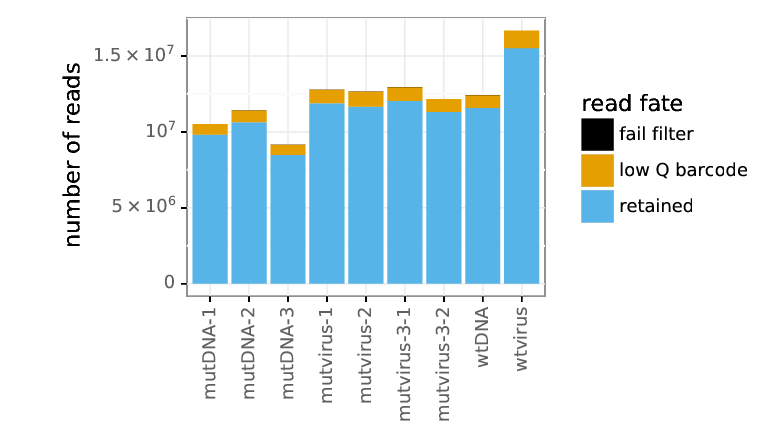

In [7]:
showPDF(countsplotprefix + '_readstats.pdf', width=500)

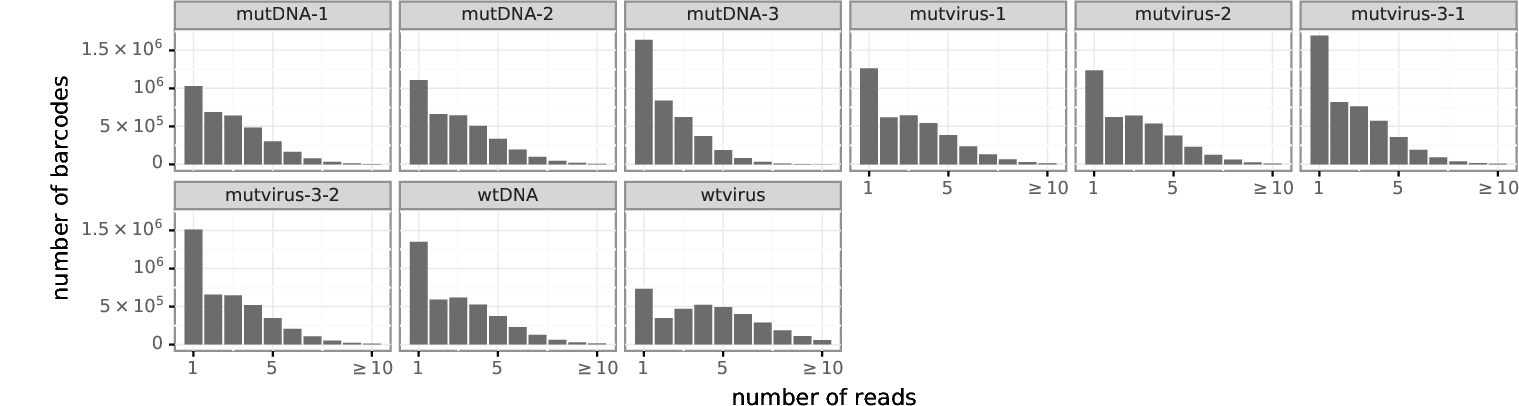

In [8]:
showPDF(countsplotprefix + '_readsperbc.pdf')

From the reads per barcode plot above, it appears that most of the samples have good sequencing depth, although mutDNA-3, mutvirus-3-1, and mutvirus-3-2 look a bit undersequenced.

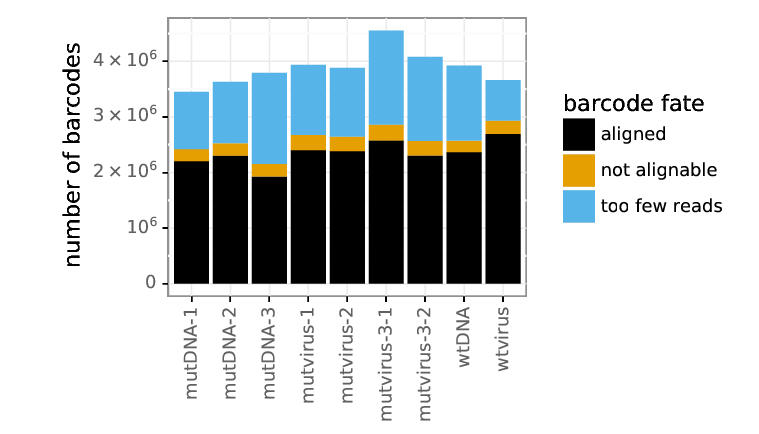

In [9]:
showPDF(countsplotprefix + '_bcstats.pdf', width=500)

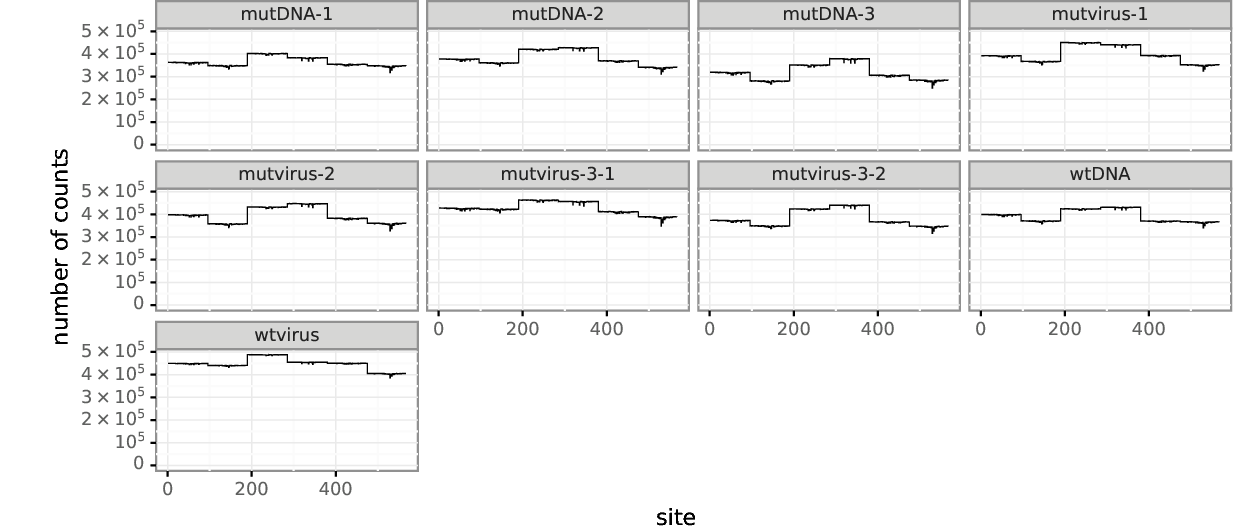

In [10]:
showPDF(countsplotprefix + '_depth.pdf')

The sequencing depth across the HA gene appears to be quite even for each sample. There are small dips near the middle of the subamplicon where sequencing quality drops near the end of R1 and R2. However, by trimming each read we've been able to minimize reads that are thrown out due to poorer sequencing quality in this region.

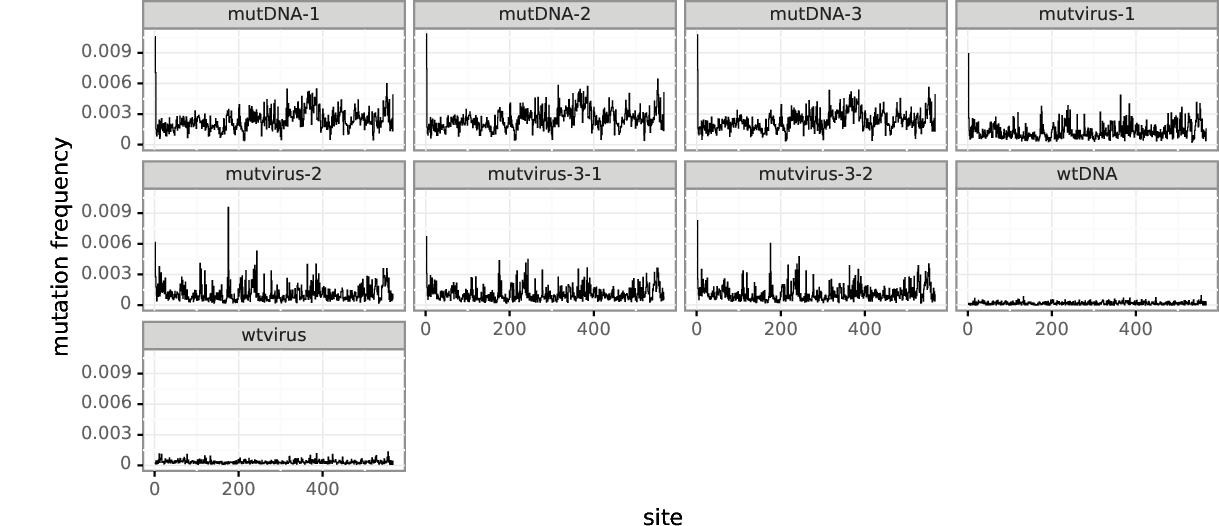

In [11]:
showPDF(countsplotprefix + '_mutfreq.pdf')

The mutation frequencies are highest in the mutDNA samples and lowest in the wtDNA and wtvirus samples. There is a spike in mutation frequency at what appears to be the first codon in each of the three mutDNA samples as well as the mutvirus samples. However, close examination of the mutations in the first codon does not reveal anything too aberrant, and this high mutation frequency may be due to biases in codon mutagenesis.

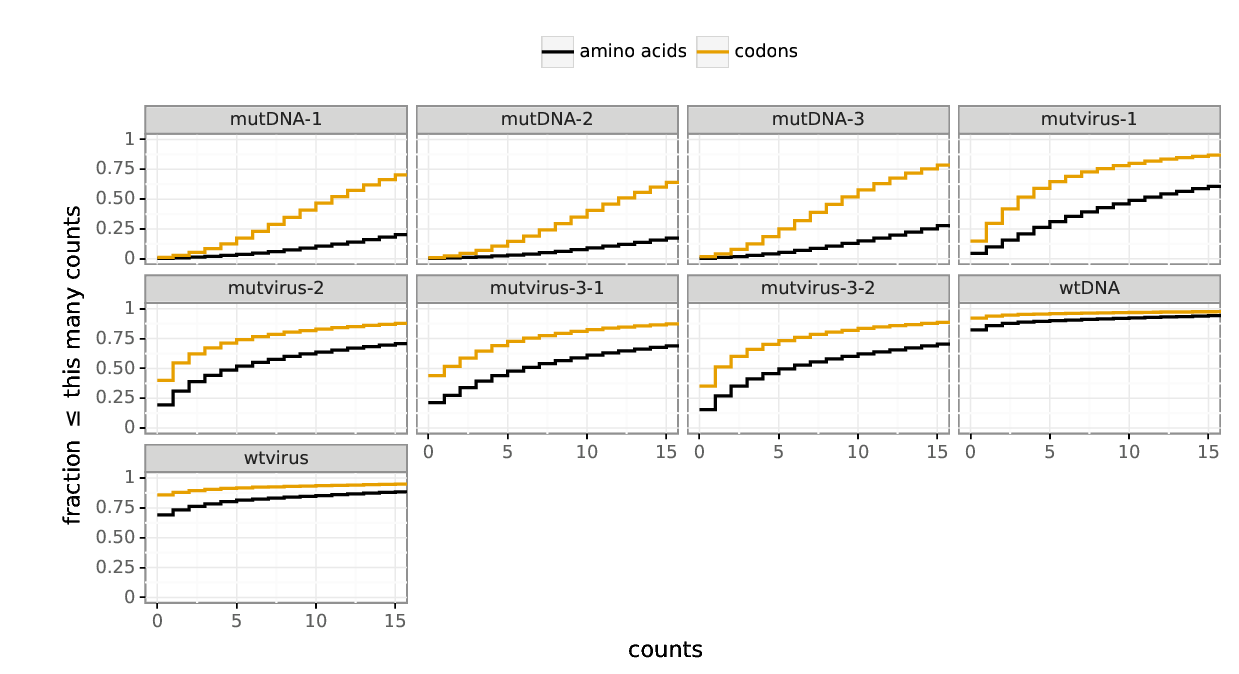

In [12]:
showPDF(countsplotprefix + '_cumulmutcounts.pdf')

The cumulative mutation counts plot above shows that nearly all codon and amino-acid mutations were sampled at least once in the mutant DNA samples, indicating that our plasmid libraries carry nearly all mutations, as is desired.

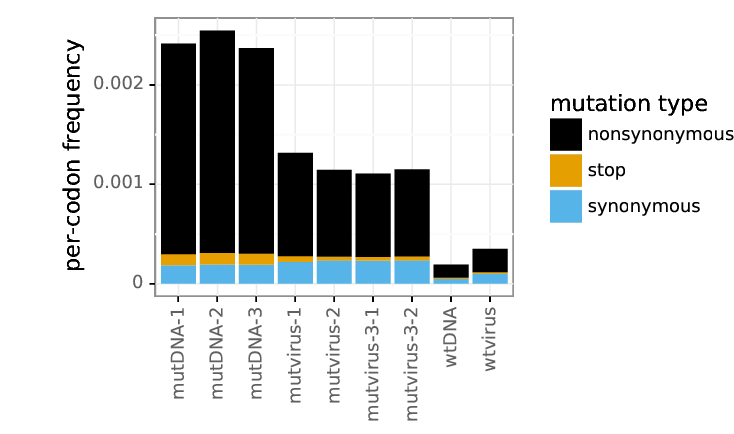

In [13]:
showPDF(countsplotprefix + '_codonmuttypes.pdf', width=500)

As expected, the mutation frequencies of the wildtype plasmid and the wildtype virus controls are low, and the wildtype virus has a slightly higher mutation frequency than the wildtype plasmid does, because viral replication is an error-prone process.
After error correction, the frequencies of the stop and nonsynonymous mutations in the passaged mutant viruses have dropped relative to their starting frequencies in the mutant plasmid libraries.
This indicates that we are selecting against presumably non-functional HA variants. 
Although there is some incomplete purging of stop codons (20-45% remaining after error correction), this is likely from genetic complementation due to co-infection.

In [14]:
codonmuttypes = pd.read_csv(countsplotprefix + '_codonmuttypes.csv').sort_index(axis=1)
display(HTML(codonmuttypes.to_html(index=False)))

name,nonsynonymous,stop,synonymous
mutDNA-1,0.002118,0.000112,0.000186
mutDNA-2,0.002237,0.000117,0.000193
mutDNA-3,0.002068,0.000112,0.000191
mutvirus-1,0.001039,0.000059,0.000219
mutvirus-2,0.000875,0.000036,0.000235
mutvirus-3-1,0.000838,0.000039,0.000232
mutvirus-3-2,0.000876,0.000040,0.000235
wtDNA,0.000130,0.000015,0.000047
wtvirus,0.000233,0.000015,0.000102


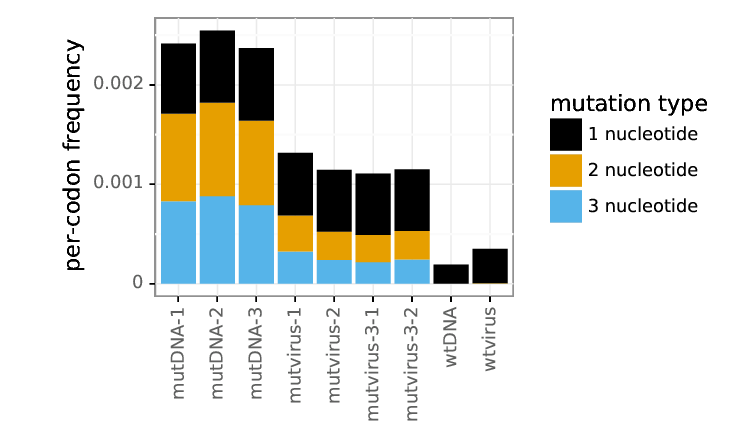

In [15]:
showPDF(countsplotprefix + '_codonntchanges.pdf', width=500)

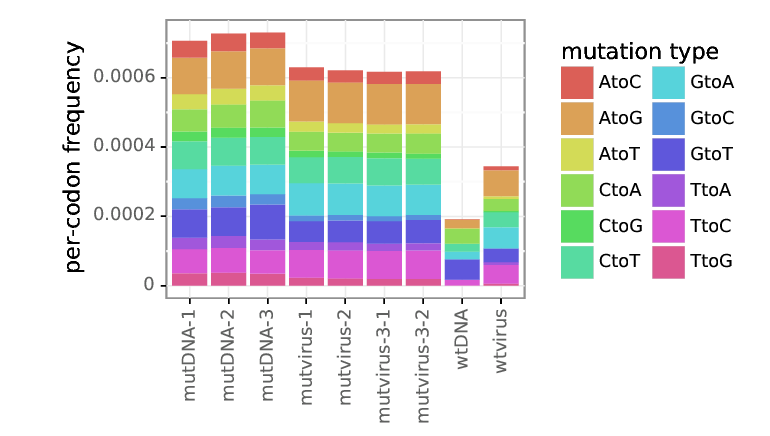

In [16]:
showPDF(countsplotprefix + '_singlentchanges.pdf', width=500)

Although there might be some signs of slight oxidative damage (`C to A` and `G to T` mutations), especially in the wtDNA and mutDNA-3 samples, overall we see a fairly even distribution of nucleotide changes, with some enrichment for transition mutations.

## Estimate the site-specific amino-acid preferences

Now that we have aligned and counted the mutations for each of our samples, we will now use these counts to estimate the amino-acid preferences for each site in HA.

Our pre-selection samples are the each of the mutDNA-* samples, and the post-selection samples are the mutvirus-* samples. The wtDNA and wtvirus will serve as our "error controls."

In [17]:
# create batch file for dms2_batch_prefs
prefsbatch = pd.DataFrame(
        columns=['name', 'pre', 'post', 'errpre', 'errpost'],
        data=[('replicate-1', 'mutDNA-1', 'mutvirus-1', 'wtDNA', 'wtvirus'),
              ('replicate-2', 'mutDNA-2', 'mutvirus-2', 'wtDNA', 'wtvirus'),
              ('replicate-3-1', 'mutDNA-3', 'mutvirus-3-1', 'wtDNA', 'wtvirus'), 
              ('replicate-3-2', 'mutDNA-3', 'mutvirus-3-2', 'wtDNA', 'wtvirus')]
        )
prefsbatchfile = os.path.join(prefsdir, 'batch.csv')
print("Here is the batch file that we write to CSV format to use as input:")
display(HTML(prefsbatch.to_html(index=False)))
prefsbatch.to_csv(prefsbatchfile, index=False)

print("Running dms2_batch_prefs...")
log = !dms2_batch_prefs \
        --indir {countsdir} \
        --batchfile {prefsbatchfile} \
        --outdir {prefsdir} \
        --summaryprefix summary \
        --use_existing {use_existing} 
print("Completed running dms2_batch_prefs")

Here is the batch file that we write to CSV format to use as input:


name,pre,post,errpre,errpost
replicate-1,mutDNA-1,mutvirus-1,wtDNA,wtvirus
replicate-2,mutDNA-2,mutvirus-2,wtDNA,wtvirus
replicate-3-1,mutDNA-3,mutvirus-3-1,wtDNA,wtvirus
replicate-3-2,mutDNA-3,mutvirus-3-2,wtDNA,wtvirus


Running dms2_batch_prefs...
Completed running dms2_batch_prefs


In [18]:
!ls {prefsdir}/*_prefs.csv

./results/preferences//renum_replicate-1_prefs.csv
./results/preferences//renum_replicate-2_prefs.csv
./results/preferences//renum_replicate-3_prefs.csv
./results/preferences//replicate-1_prefs.csv
./results/preferences//replicate-2_prefs.csv
./results/preferences//replicate-3-1_prefs.csv
./results/preferences//replicate-3-2_prefs.csv
./results/preferences//replicate-3_prefs.csv


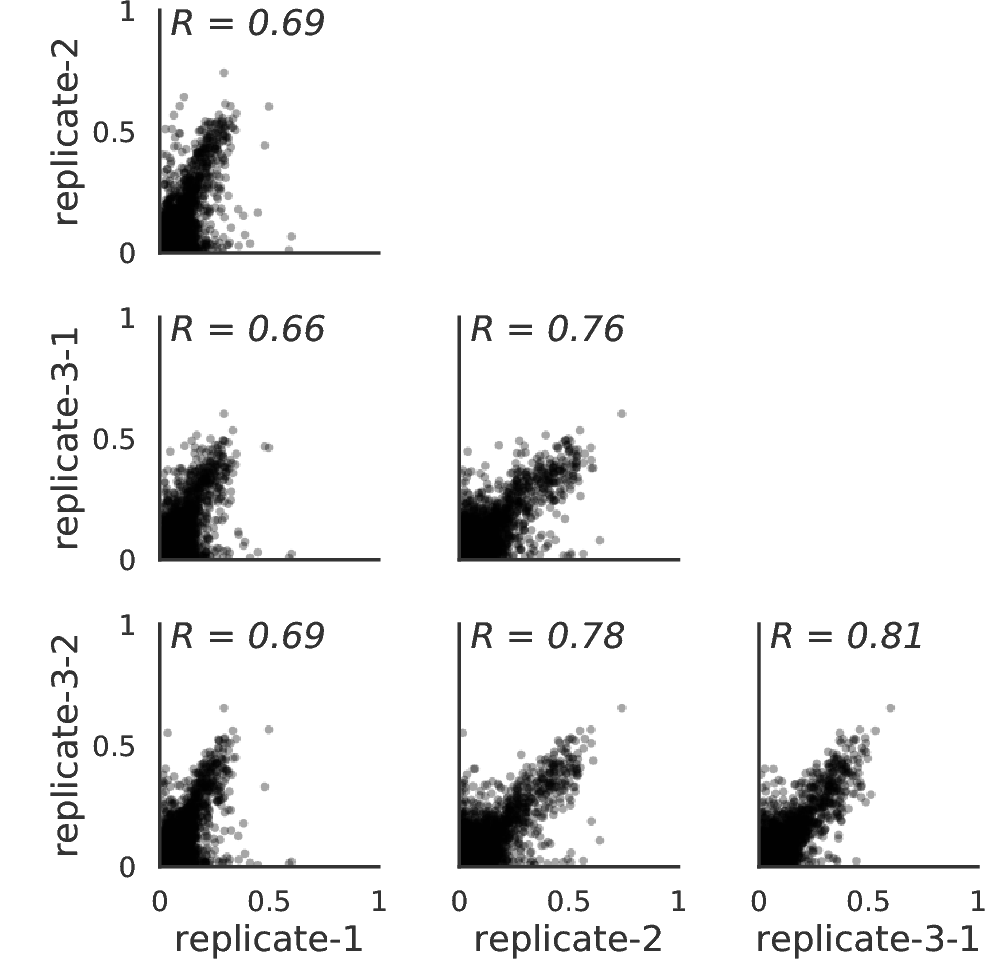

In [19]:
showPDF(os.path.join(prefsdir, 'summary_prefscorr.pdf'), width=300)

The Pearson's $R$ ranges from 0.66 to 0.78, showing that the biological replicates are fairly reproducible. In addition, the correlation between the two technical replicates (3-1 and 3-2) is only slightly higher than that between biological replicates, which indicates that bottlenecking of variants _after_ helper-virus rescue of the viral library contribute to most of the experimental noise observed among replicates.

## Renumber preferences to H3 numbering and average across replicates

We will now renumber the preferences from sequential (1, 2, ... starting from the initial Met) to H3 numbering. 
The signal peptide is numbered with negative values, and the HA1 and HA2 subunits are numbered separately. 
This numbering scheme is based on an alignment to a PDB structure for an H3 HA [4HMG](https://www.rcsb.org/pdb/explore/explore.do?structureId=4HMG). 
We will use:
1. The [./data/H3renumbering_scheme.csv](./data/H3renumbering_scheme.csv) file to convert the sequential numbers into the H3 numbering scheme
2. The [dms_tools2.utils.renumberSites](https://jbloomlab.github.io/dms_tools2/dms_tools2.utils.html#dms_tools2.utils.renumberSites) function to renumber the codon counts files

The renumbered files will be created in a new `H3renumberedprefs` directory and will possess the same names as the original preferences files created from `dms2_batch_bcsuabmp` above.

Before renumbering, we must first average across the two technical replicates of replicate 3. 
After taking the average of the technical replicates, we will renumber the preferences files.
Finally, we will average across the biological replicates.

In [20]:
# Average across the two technical replicates of replicate 3
rep3df = dms_tools2.prefs.avgPrefs(
        glob.glob('{0}/replicate-3-*_prefs.csv'.format(prefsdir)))
rep3df.to_csv('{0}/replicate-3_prefs.csv'.format(prefsdir), index=False)

In [21]:
renumberfile = './data/H3renumbering_scheme.csv'

# preferences files to renumber
prefsfiles = glob.glob('{0}/replicate-*_prefs.csv'.format(prefsdir))

dms_tools2.utils.renumberSites(renumberfile, prefsfiles, missing='drop', 
        outdir=renumberedprefsdir)

In [22]:
# Average across the three biological replicates
avgprefsdf = dms_tools2.prefs.avgPrefs(
        glob.glob('{0}/replicate-?_prefs.csv'.format(renumberedprefsdir)))
avgprefsdf.to_csv('{0}/summary_avgprefs.csv'.format(renumberedprefsdir), index=False)

seqnum_avgprefsdf = dms_tools2.prefs.avgPrefs(
        glob.glob('{0}/replicate-?_prefs.csv'.format(prefsdir)))
seqnum_avgprefsdf.to_csv('{0}/summary_avgprefs.csv'.format(prefsdir), index = False)

avgprefs = os.path.join(renumberedprefsdir, 'summary_avgprefs.csv')
avgprefs_seqnum = os.path.join(prefsdir, 'summary_avgprefs.csv')

# Fit preferences to the evolution of natural H3 sequences

We will now use the preferences estimated above and fit these to the natural evolution of human H3N2 and swine H3N2 HA sequences. 
To do so, we will fit an experimentally-informed codon substitution model (ExpCM) (see [Bloom 2014](http://mbe.oxfordjournals.org/content/31/8/1956) and [Hilton and Bloom 2017](https://peerj.com/articles/3657/)) using the preferences and compare the ExpCM with conventional codon substitution models.
We will accomplish this using the [phydms](http://jbloomlab.github.io/phydms/) software ([Hilton and Bloom 2017](https://peerj.com/articles/3657/)).

For the phylogenetic fitting, we will use an alignment of human H3 HA sequences.
We downloaded all full-length human H3N2 HA sequences from the [Influenza Virus Resource](https://www.ncbi.nlm.nih.gov/genomes/FLU/Database/nph-select.cgi?go=database), and subsampled two sequences per year.
We then aligned the sequences using `MAFFT`, and the aligned sequences are in the [./data](./data) directory as `H3_human_alignment.fa`.

Note that [RAxML](https://sco.h-its.org/exelixis/web/software/raxml/index.html) must be available at the path specified in the cell below.

In [23]:
print("Using the following version of phydms:")
!phydms -v

raxmlpath = 'raxmlHPC' # name of RAxML executable
hosts = ['human', 'swine']

for host in hosts:
    alignment = './data/H3_{0}_alignment.fa'.format(host)
    modelcomparison = '{0}/{1}_modelcomparison.md'.format(phydmsdir, host)
    if use_existing == 'yes' and os.path.isfile(modelcomparison):
        print('Results of phydms analysis for {0} alignment already exist.'.format(host))
    else:
        print('Running phydms_comprehensive...')
        outprefix = '{0}/{1}'.format(phydmsdir, host)
        !phydms_comprehensive \
               {outprefix} \
               {alignment} \
               {avgprefs_seqnum} \
               --raxml {raxmlpath} \
               --omegabysite \
               --diffprefsbysite
        print('Analysis for {0} alignment complete.'.format(host))

Using the following version of phydms:
phydms 2.3.dev1
Results of phydms analysis for human alignment already exist.
Results of phydms analysis for swine alignment already exist.


In [24]:
print('This is the model comparison using a human alignment:')
modelcomparison = '{0}/human_modelcomparison.md'.format(phydmsdir, host)
display(Markdown(modelcomparison))

This is the model comparison using a human alignment:


| Model                           | deltaAIC | LogLikelihood | nParams | ParamValues                                   |
|---------------------------------|----------|---------------|---------|-----------------------------------------------|
| ExpCM_summary_avgprefs          | 0.00     | -8441.16      | 6       | beta=2.47, kappa=5.76, omega=0.91             |
| YNGKP_M5                        | 2093.92  | -9482.12      | 12      | alpha_omega=0.30, beta_omega=0.84, kappa=5.10 |
| averaged_ExpCM_summary_avgprefs | 2500.72  | -9691.52      | 6       | beta=0.67, kappa=5.58, omega=0.32             |
| YNGKP_M0                        | 2535.78  | -9704.05      | 11      | kappa=5.05, omega=0.31                        |

The results above show that the ExpCM using the averaged preferences performs substantially better than traditional codon substitution models in describing the evolution of human H3N2 viruses in nature. 

The ExpCM has an $\omega$ value close to 1 whereas traditional codon substitution models have an $\omega <<$ 1, suggesting that our experiments capture amino-acid constraints on HA.

In addition, the ExpCM fit a stringency parameter $\beta$ that is > 1, indicating that natural selection prefers the same amino acids as in our experiments, but with greater stringency.
We can use this stringency parameter to re-scale our averaged preferences (as described in [Hilton et al 2017](https://peerj.com/articles/3657/)), and we will use these averaged and re-scaled preferences for all downstream analyses below.

## Display preferences as a rescaled logoplot

I will use the rescaling parameter ( $\beta$ ) from `phydms_comprehensive` to create logoplots of rescaled preferences.
First, I will read in the beta values from the `ExpCM *_modelparams.txt` file.

In [25]:
params_file = open('{0}/human_ExpCM_summary_avgprefs_modelparams.txt'
        .format(phydmsdir), 'r')
params_lst = [line.rstrip() for line in params_file.readlines()]
params_file.close()
beta = float([line for line in params_lst if 'beta' in line][0][7:])
print ('Beta parameter for ExpCM for the averaged preferences = {0}'.format(beta))

Beta parameter for ExpCM for the averaged preferences = 2.46635


## Re-scale the preferences

In [26]:
unscaled_prefsdf = pd.read_csv(avgprefs)
rescaled_prefsdf = dms_tools2.prefs.rescalePrefs(unscaled_prefsdf, beta)

rescaledavgprefs = os.path.join(renumberedprefsdir, 'summary_avgprefs_rescaled.csv')
rescaled_prefsdf.to_csv(rescaledavgprefs, index=False)

In [27]:
rescaled_seqnum_avgprefsdf = dms_tools2.prefs.rescalePrefs(seqnum_avgprefsdf, beta)
rescaled_seqnum_avgprefsdf.to_csv('{0}/summary_avgprefs_rescaled.csv'.format(prefsdir), index=False)

In [28]:
# Domain sites file
domainfile = './data/domains.csv'

# Epitope sites file
epitopefile = './data/wolf_epitope_sites.csv'

In [29]:
seq_wtoverlayfile = os.path.join(prefsdir, 'wildtypeoverlayfile.csv')
aacounts = dms_tools2.utils.codonToAACounts(
        pd.read_csv(os.path.join(countsdir, 'wtDNA_codoncounts.csv')))
aacounts.query('wildtype != "*"')[['site', 'wildtype']].to_csv(
        seq_wtoverlayfile, index=False)

wtoverlayfile = os.path.join(renumberedprefsdir, 'wildtypeoverlayfile.csv')

dms_tools2.utils.renumberSites(renumberfile, [seq_wtoverlayfile], 
        missing='drop', outdir=renumberedprefsdir)

First, we are going to display the unscaled preferences as a logo plot.

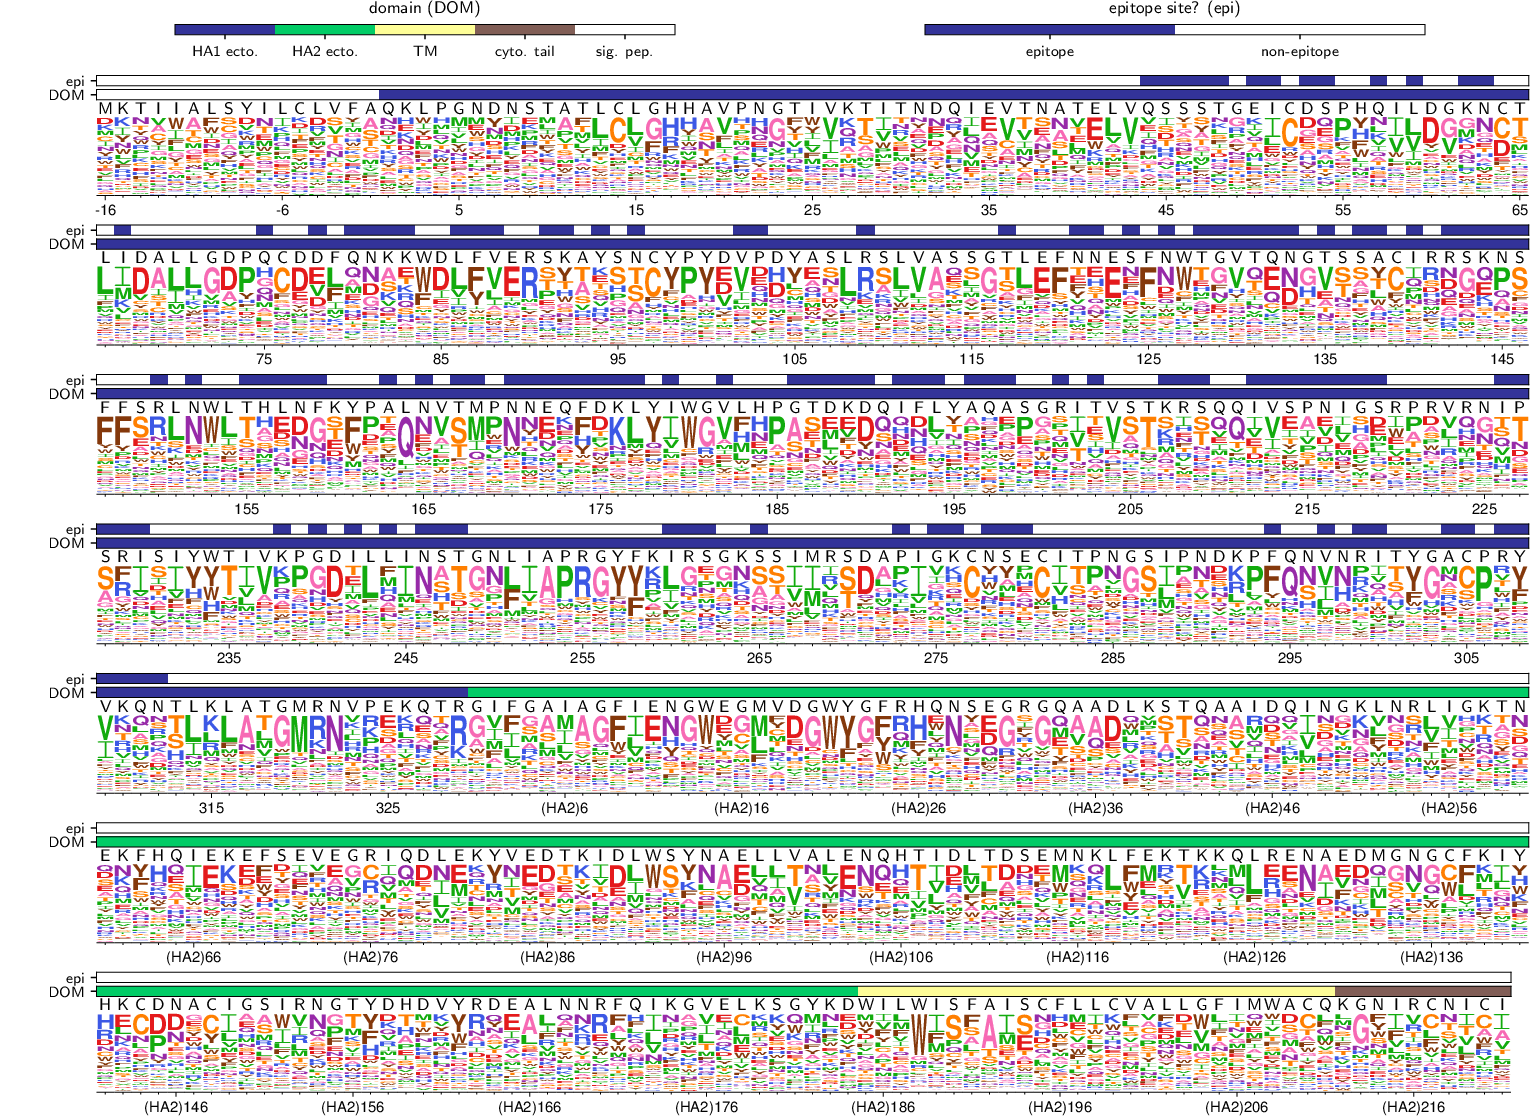

In [30]:
logoname = 'avgprefs'

log = !dms2_logoplot \
        --prefs {avgprefs} \
        --name {logoname} \
        --outdir {logodir} \
        --overlay1 {wtoverlayfile} wildtype wildtype \
        --overlay2 {domainfile} DOM "domain" \
        --overlay3 {epitopefile} epi "epitope site?" \
        --overlaycolormap "terrain" \
        --nperline 81 \
        --use_existing {use_existing}
        
logoplot = os.path.join(logodir, '{0}_prefs.pdf'.format(logoname))
showPDF(logoplot)

Next we will create the logoplot from the averaged and re-scaled preferences and display it in this notebook.
The two overlay bars will show (1) if a site is an epitope or non-epitope site, according to the set of epitope sites defined by [Wolf et al 2006](https://biologydirect.biomedcentral.com/articles/10.1186/1745-6150-1-34), and (2) the HA domain a site falls in.
The domains are HA1 ecto. = HA1 ectodomain, HA2 ecto. = HA2 ectodomain, TM = transmembrane domain, cyto. tail = cytoplasmic tail, and sig. pep. = signal peptide.

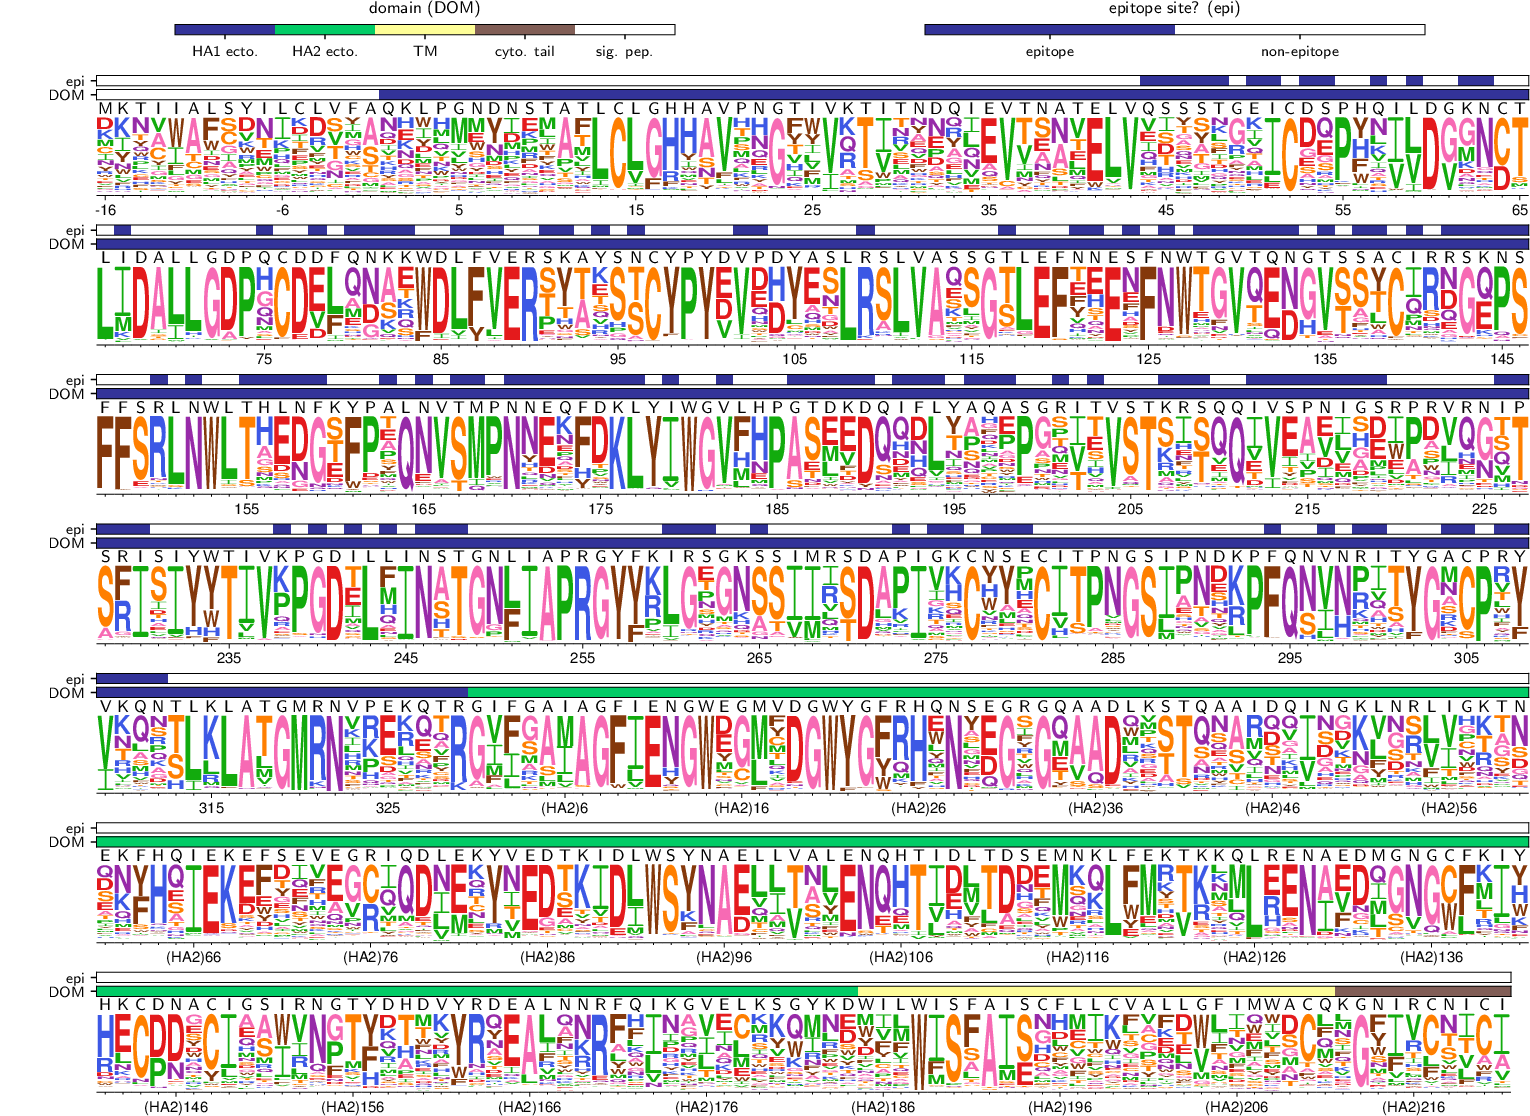

In [31]:
rescaledlogoname = 'rescaled-avgprefs'

log = !dms2_logoplot \
        --prefs {rescaledavgprefs} \
        --name {rescaledlogoname} \
        --outdir {logodir} \
        --overlay1 {wtoverlayfile} wildtype wildtype \
        --overlay2 {domainfile} DOM "domain" \
        --overlay3 {epitopefile} epi "epitope site?" \
        --overlaycolormap "terrain" \
        --nperline 81 \
        --use_existing {use_existing}
        
rescaledlogoplot = os.path.join(logodir, '{0}_prefs.pdf'.format(rescaledlogoname))
showPDF(rescaledlogoplot)

### Estimate and visualize differential preferences

Now we are going to compare the experimentally-determined preferences to amino-acid frequencies of human H3N2 HA. This will help us determine discrepancies between the amino acids that are preferred in our experiments compared the amino acids preferred in nature. To do this, we will calculate the distance between the site-specific amino-acid preferences and the amino-acid frequencies from the sequence alignment of natural human H3N2 HA sequences used above in the `phydms` analysis. This is identical to how we compare amino-acid preferences of protein homologs (_e.g.,_ H3 and H1 preference comparisons performed below in this analysis notebook).

First, we need to calculate the amino-acid frequencies from the natural HA sequence alignment. Then we will renumber the sites to H3 numbering so that we can compare these frequencies with the H3 renumbered experimentally-determined preferences. Finally, we will duplicate the amino-acid frequencies `csv` file in order to calculate "within homolog" replicate distances. 

In [32]:
aln_freqs_file = '{0}/H3_alignment_frequences.csv'.format(prefsdir)

H3align_aafreqsdf = dms_tools2.prefs.aafreqsFromAlignment('./data/H3_human_alignment.fa', codon_to_aa=True)
H3align_aafreqsdf.to_csv(aln_freqs_file, index=False)

# Renumber the aln_freqs_file to H3 numbering
dms_tools2.utils.renumberSites(
        renumberfile, 
        [aln_freqs_file], 
        missing='drop', 
        outdir=renumberedprefsdir)

In [33]:
!cp ./results/H3renumberedprefs/H3_alignment_frequences.csv ./results/H3renumberedprefs/H3_alignment_frequences_copy.csv

We also need to re-scale each replicate of the H3 renumbered preferences so that we can compare the preferences with the natural amino-acid frequencies.

In [34]:
# Rescale each of the renumbered replicate preferences
for r in [1, 2, 3]:
    unscaled = '{0}/replicate-{1}_prefs.csv'.format(renumberedprefsdir, r)
    rescaled = os.path.join(renumberedprefsdir, 'replicate-{0}_prefs_rescaled.csv'.format(r))
    (dms_tools2.prefs.rescalePrefs(pd.read_csv(unscaled), beta).to_csv(rescaled, index=False))

Now we are going to compare the distances between the amino-acid preferences and their frequencies in nature. To do so, we are going to use the `comparePrefs` module of `dms_tools2`.

In [35]:
rescaled_renum_prefs = glob.glob('{0}/replicate-?_prefs_rescaled.csv'.format(renumberedprefsdir))
aln_freqs_files = ['{0}/H3_alignment_frequences.csv'.format(renumberedprefsdir), 
                   '{0}/H3_alignment_frequences_copy.csv'.format(renumberedprefsdir)]

prefs_to_aln_dist = dms_tools2.compareprefs.comparePrefs(rescaled_renum_prefs, 
                                                         aln_freqs_files)
prefs_to_aln_distfile = os.path.join(renumberedprefsdir, 'prefs_to_aln_dist.csv')
prefs_to_aln_dist.to_csv(prefs_to_aln_distfile, index=False)

Now, we are going to visualize the differential preferences as a logoplot. Amino acids above the line are more preferred in our experiments while amino acids below the line are more preferred in natural sequences.

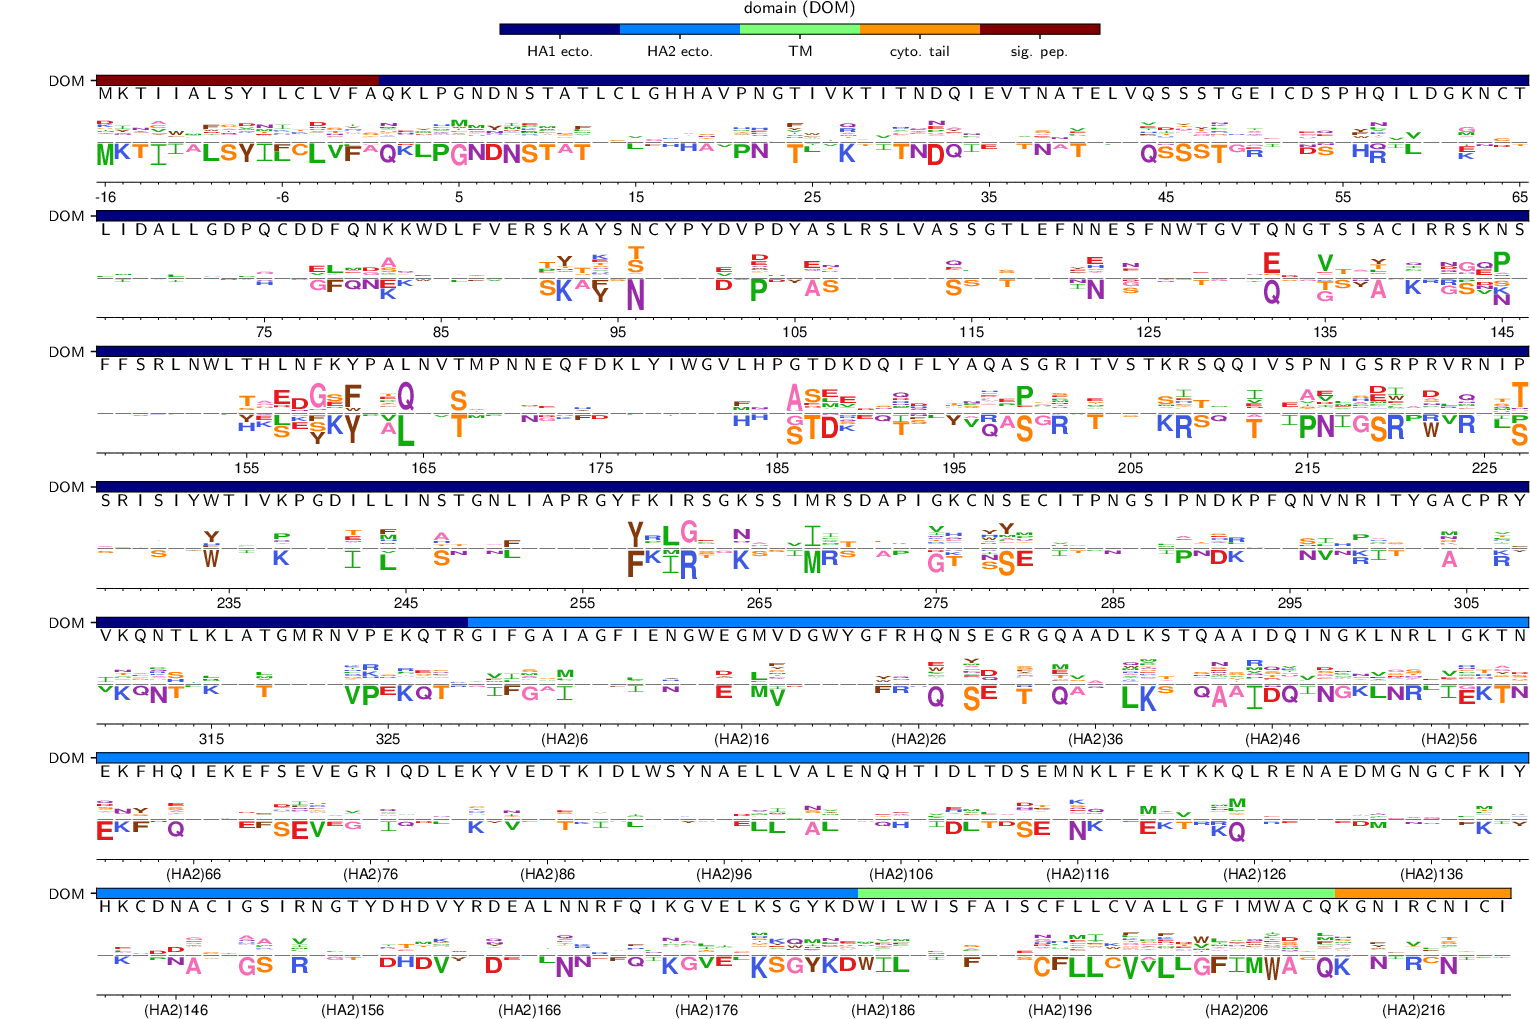

In [36]:
prefs_aln_logoname = 'prefs-to-aln'

log = !dms2_logoplot \
    --diffprefs {prefs_to_aln_distfile} \
    --name {prefs_aln_logoname} \
    --outdir {logodir} \
    --overlay1 {wtoverlayfile} wildtype wildtype \
    --overlay2 {domainfile} DOM "domain" \
    --nperline 81 \
    --ignore_extracols yes \
    --use_existing {use_existing}

prefs_aln_logoplot = os.path.join(logodir, '{0}_diffprefs.pdf'.format(prefs_aln_logoname))
showPDF(prefs_aln_logoplot)

From the logoplot above, we observe some sites where there seem to be little to no differences between our experimentally-determined preferences and the amino-acid frequencies in nature. However, at other sites we do observe modest to large differences where one or multiple amino acids may be preferred but another amino acid is frequent in nature. These differences could be attributed to discrepancies between cell culture and nature in capturing constraints on HA function, or may be because some sites are not under strong positive selection (_e.g.,_ immune selection) in nature.

## Calculate the site entropy and write to a new preferences file

We will also calculate the mutational tolerance of each site using two metrics: the Shannon entropy and the number of effective amino acids. 
This will allow us to examine the mutational tolerance of different regions of the Perth/2009 H3 HA.
The preferences file with the site entropies will be written into a new preferences file.

In [37]:
entropy_prefsdf = dms_tools2.prefs.prefsEntropy(rescaled_prefsdf, dms_tools2.AAS)

entropyprefs = os.path.join(renumberedprefsdir, 
        'summary_avgprefs_rescaled_entropies.csv')
entropy_prefsdf.to_csv(entropyprefs, index=False)

In [38]:
entropy_seqnum_prefsdf = dms_tools2.prefs.prefsEntropy(rescaled_seqnum_avgprefsdf, dms_tools2.AAS)

entropy_seqnum_prefsdf.to_csv('{0}/summary_avgprefs_rescaled_entropies.csv'.format(prefsdir), index=False)

# Compare the preferences between the HA homologs

In this section, we will compare the preferences between the two HA variants: **Perth/2009 H3** and **WSN/1933 H1**. 
These two HA's share 42% amino-acid identity.
The WSN/1933 HA preferences were previously measured in [Doud and Bloom (2016)](http://www.mdpi.com/1999-4915/8/6/155). 
As a control, we will also compare the preferences of each of the HA variants with the non-homologous protein HIV Env (BF520).
The HIV Env preferences were previously measured in [Haddox et al (2017)](https://www.biorxiv.org/content/early/2017/12/16/235630).

First, we need to renumber and rescale the preferences so that we can make comparisons between the two HA homologs. 
We aligned the Perth/2009 H3 and WSN/1933 H1 amino-acid sequences using `mafft`. 
The alignment `fasta` file is provided in the [`./data/`](./data/) directory as `Perth2009_WSN_aa_align.fa`.

I will renumber each of the preferences file based on the alignment and remove sites that do not align. The renumbering files are provided in the [`./data/`](./data/) directory as `<homolog>_compareprefs_renumber.csv`, where `<homolog>` is "Perth2009" or "WSN".

The WSN preferences will be rescaled using the stringency parameter fit in the example analysis notebook [Doud2016](https://github.com/jbloomlab/dms_tools2/blob/master/examples/Doud2016/analysis_notebook.ipynb) from `dms_tools2`.
The renumbered unscaled preferences files for each replicate will be created in the `preferences` or `WSNpreferences` directories.
The renumbered and re-scaled preferences will be created in the `prefsdist` directory.

In [39]:
# the homologs that we are examining
homologs = ['Perth', 'WSN']

# Renumber unscaled preferences
Perth_renumbfile = './data/Perth2009_compareprefs_renumber.csv'
dms_tools2.utils.renumberSites(
        Perth_renumbfile, 
        sorted(glob.glob('{0}/replicate-?_prefs.csv'.format(prefsdir))), 
        missing='drop', 
        outprefix='renum_')

WSN_renumbfile = './data/WSN_compareprefs_renumber.csv'
dms_tools2.utils.renumberSites(
        WSN_renumbfile, 
        sorted(glob.glob('{0}/WSN_replicate-?_prefs.csv'.format(inputdir))), 
        missing='drop', 
        outfiles=['{0}/renum_replicate-{1}_prefs.csv'.format(WSNprefsdir, x) 
                  for x in range(1,4)])

# Rescale WSN HA preferences
WSN_stringency = 2.05
for r in [1, 2, 3]:
    unscaled = '{0}/renum_replicate-{1}_prefs.csv'.format(WSNprefsdir, r)
    rescaled = os.path.join(prefsdistdir, 
            'WSN_replicate-{0}_prefs_rescaled.csv'.format(r))
    (dms_tools2.prefs.rescalePrefs(pd.read_csv(unscaled), WSN_stringency)
            .to_csv(rescaled, index=False))
    
# Rescale Perth/2009 HA preferences
for r in [1, 2, 3]:
    unscaled = '{0}/renum_replicate-{1}_prefs.csv'.format(prefsdir, r)
    rescaled = os.path.join(prefsdistdir, 
            'Perth_replicate-{0}_prefs_rescaled.csv'.format(r))
    (dms_tools2.prefs.rescalePrefs(pd.read_csv(unscaled), beta)
            .to_csv(rescaled, index=False))

## Correlate the Perth/2009 H3 and WSN/1933 H1 preferences

First, we will examine the correlations between Perth/2009 and WSN HA preferences.

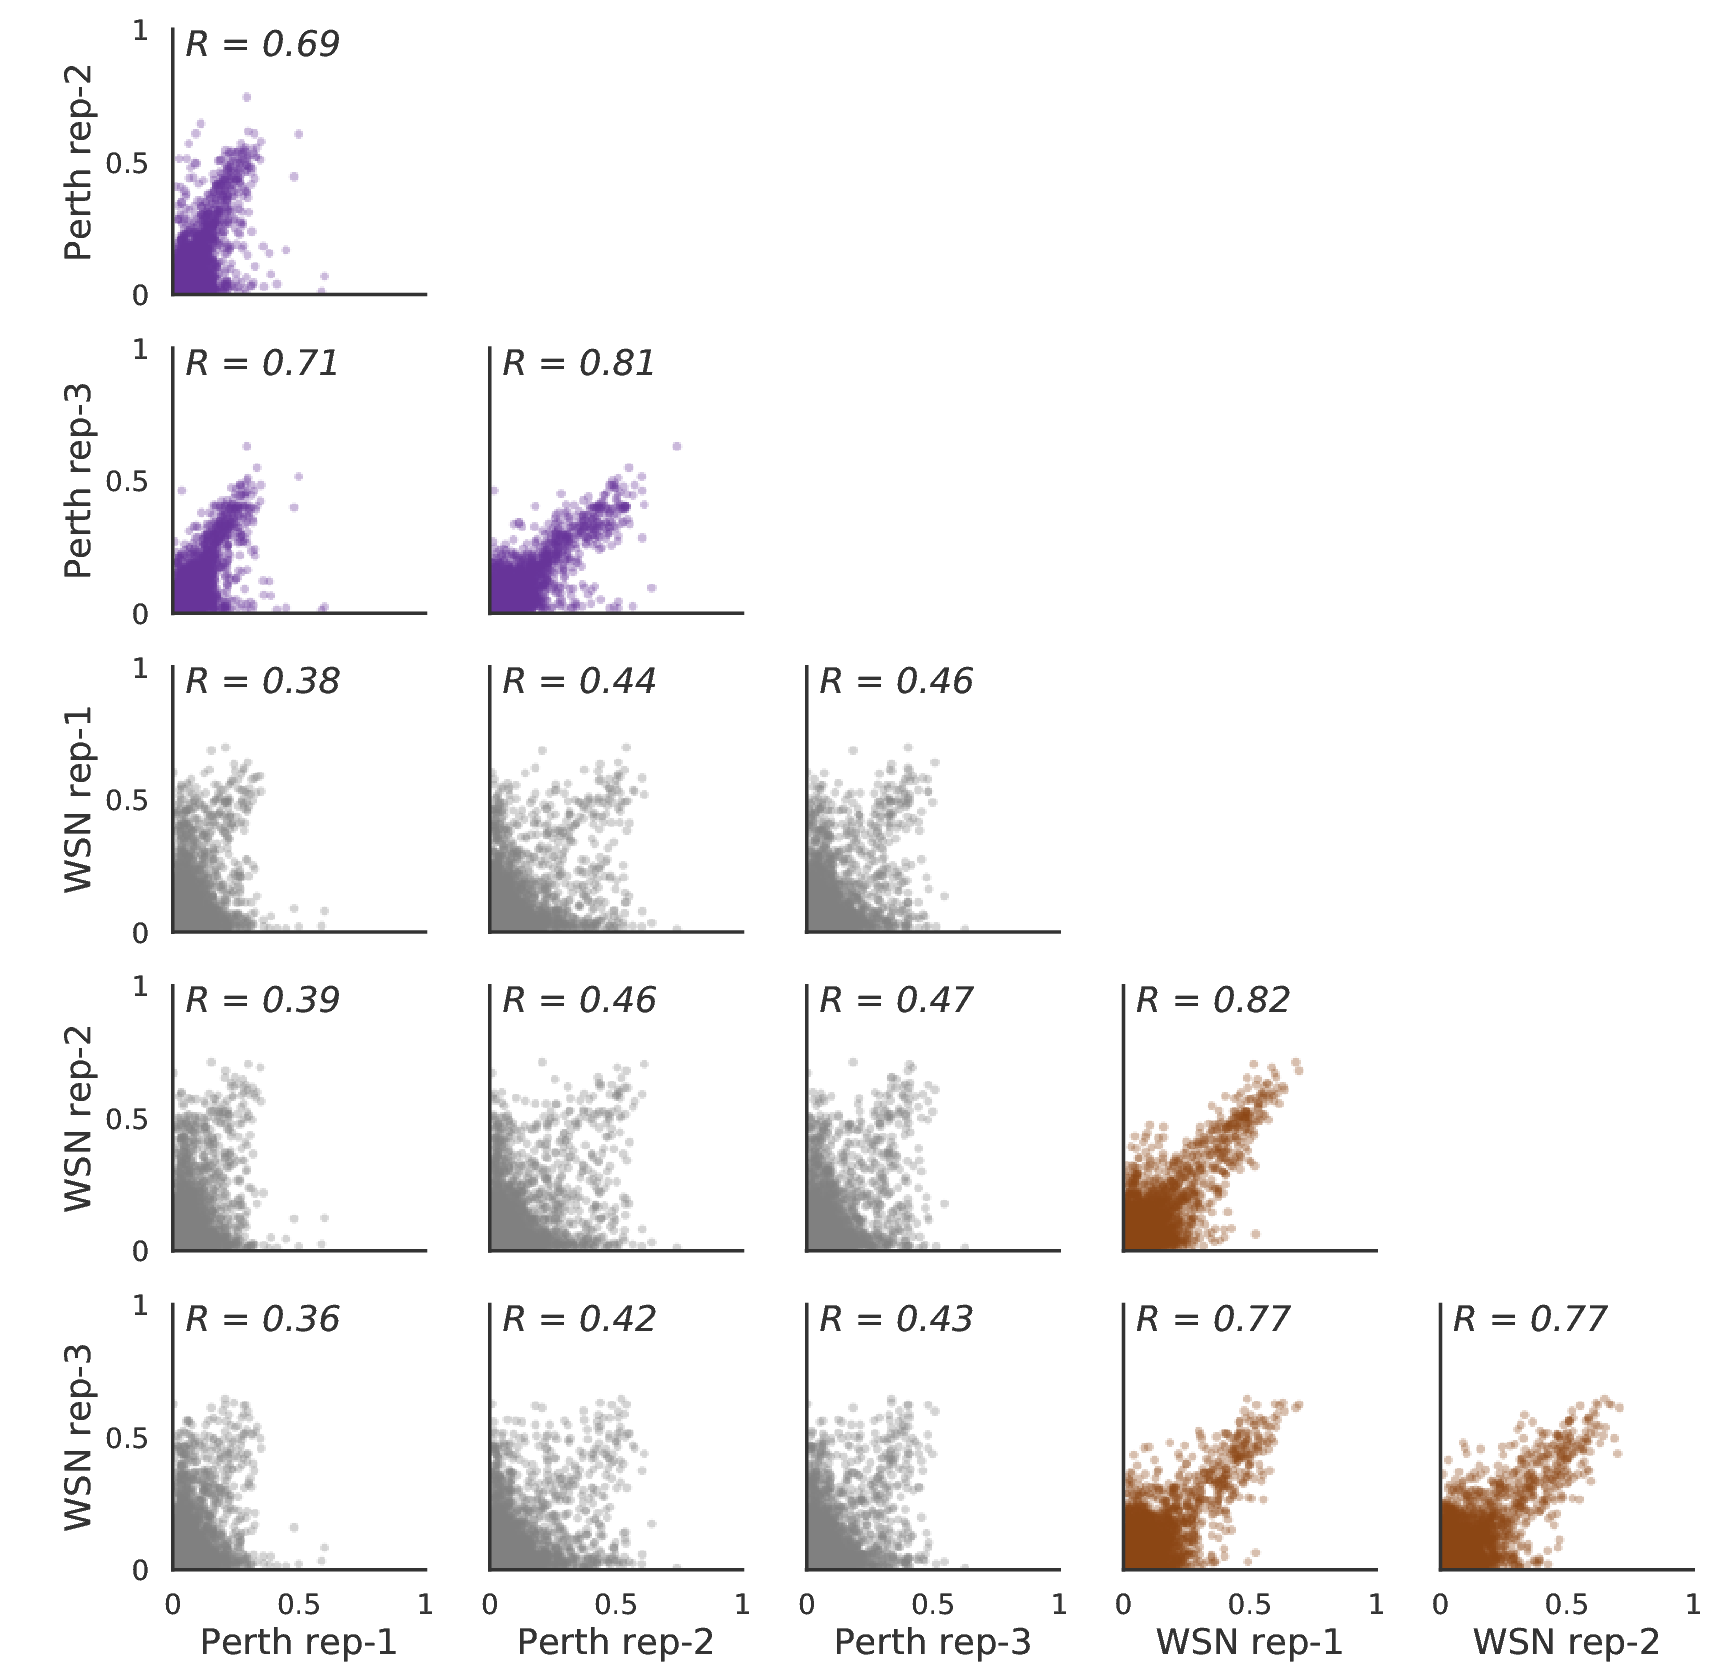

In [40]:
homolog_corrs = os.path.join(prefsdistdir, 'homolog_correlations.pdf')

prefs_names = ['WSN rep-1', 'WSN rep-2', 'WSN rep-3', 
               'Perth rep-1', 'Perth rep-2', 'Perth rep-3']

allHAprefs = glob.glob('{0}/renum_replicate-*_prefs.csv'.format(prefsdir)) \
                + glob.glob('{0}/renum_replicate-*_prefs.csv'.format(WSNprefsdir))

# how to color scatter plots depending on which homologs
# this will break for different numbers of homologs
colors = (['rebeccapurple'] * 3 + ['gray'] * 6 + ['saddlebrown'] + 
          ['gray'] * 3 + ['saddlebrown'] * 2)

dms_tools2.plot.plotCorrMatrix(prefs_names, 
                               sorted(allHAprefs), 
                               homolog_corrs, 
                               'prefs', 
                               trim_unshared=True, 
                               colors=colors)

showPDF(homolog_corrs)

From the correlations above, it is apparent that the replicates measurements on the same HA variant (purple and brown plots) are more correlated than on different variants (gray plots).
Therefore, it seems that there are substantial shifts in the preferences between the two HA variants.

## Compute the distances between preferences

In order to quantitatively compare the preferences, we will use the [compareprefs module of dms_tools2](https://jbloomlab.github.io/dms_tools2/dms_tools2.compareprefs.html) to compute $RMSD_{corrected}$ values that allow us to account for experimental noise in the measurements within a given homolog.

We compare to some of the values for HIV BG505 and BF520 from [Haddox et al](https://doi.org/10.1101/235630)

In [41]:
# distances between the two HA homologs
assert len(homologs) == 2, "plotting needs to be refactored if > 2 homologs"
prefs1 = glob.glob('{0}/Perth_replicate-*_prefs_rescaled.csv'.format(prefsdistdir))
prefs2 = glob.glob('{0}/WSN_replicate-*_prefs_rescaled.csv'.format(prefsdistdir))

prefsdist = dms_tools2.compareprefs.comparePrefs(prefs1, prefs2)
prefsdistfile = os.path.join(prefsdistdir, '{0}_to_{1}_prefs_dist.csv'.format(*homologs))
prefsdist.to_csv(prefsdistfile, index=False)

# distances for all randomizations of 3 replicates per homolog
rand_dists = []
assert len(prefs1) == len(prefs2) == 3, "code expects 3 replicates / homologs"
for set1 in itertools.combinations(prefs1 + prefs2, 3):
    set2 = [iprefs for iprefs in prefs1 + prefs2 if iprefs not in set1]
    rand_dists += (dms_tools2.compareprefs.comparePrefs(set1, set2)
                      ['RMSDcorrected'].tolist())

# distances from each homolog to BF520 Env prefs
env_prefs = glob.glob('{0}/Env_BF520_replicate-*_prefs_rescaled.csv'.format(inputdir))
ha_env_dist = {}
for (homolog, homologprefs) in zip(homologs, [prefs1, prefs2]):
    ha_env_dist[homolog] = (dms_tools2.compareprefs.comparePrefs(env_prefs, 
            homologprefs)['RMSDcorrected'].tolist())
    
# read in distances for Env homologs
env_dists = (pd.read_csv(os.path.join(inputdir, 'BG505_to_BF520_prefs_dist.csv'))
             ['RMSDcorrected']
             .tolist()
             )

Now we will plot the distribution of shifts in preferences for each of the homolog comparisons in a joyplot.

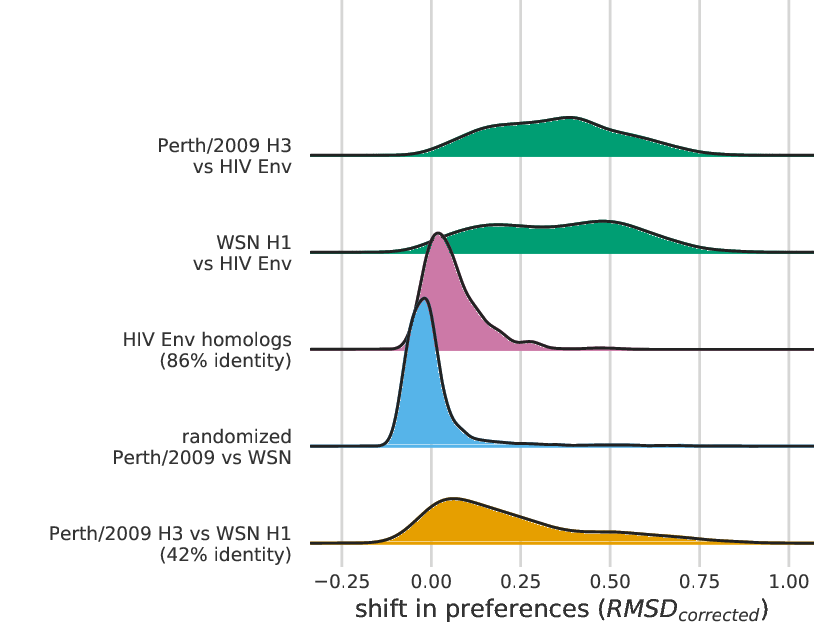

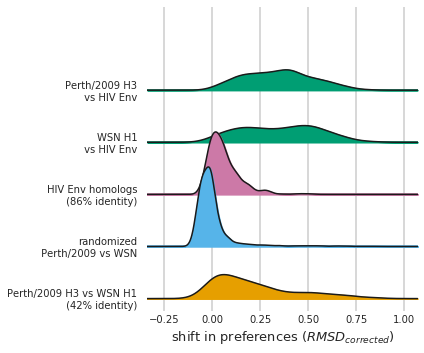

In [42]:
distplot = os.path.join(prefsdistdir, 'distance_distribution.pdf')

actual_dists = prefsdist['RMSDcorrected'].tolist()

# the data to plot
joyplot_data = collections.OrderedDict([
                ('Perth/2009 H3\n vs HIV Env', ha_env_dist[homologs[0]]),
                ('WSN H1\n vs HIV Env', ha_env_dist[homologs[1]]),
                ('HIV Env homologs\n (86% identity)', env_dists),
                ('randomized\n Perth/2009 vs WSN', rand_dists),
                ('Perth/2009 H3 vs WSN H1\n (42% identity)', actual_dists)])
    
# colors for each comparison: same color for the two HA comparisons
cmap = mpl.colors.ListedColormap(["#009E73", "#009E73", "#CC79A7", "#56B4E9", "#E69F00"])

# make the joyplot
joypy.joyplot(joyplot_data,
              grid='x',
              overlap=1,
              linewidth=1.5,
              figsize=(6, 4.8),
              colormap = cmap,
             )
plt.xlabel('shift in preferences ($RMSD_{corrected}$)', size=13)

# save and show
plt.savefig(distplot)
showPDF(distplot, width=600)

The plot above shows that many sites between the Perth/2009 H3 and the WSN/1933 H1 HA's have substantially shifted. 
This is evident from the large tail in the orange distribution of shifts compared to:
1. the distribution expected solely from experimental noise (randomized Perth/2009 and WSN, in blue)
2. the distribution for the two HIV Env variants, which share 86% amino-acid identity (pink).

However, the extent of the shifts between the two HA variants is still less than that between two non-homologous proteins (either HA and HIV Env, in green).

In [43]:
# compute P-values
rand_dists = np.array(rand_dists)
actual_dists = sorted(actual_dists, reverse=True)
n = float(len(rand_dists))
pvals = [np.greater_equal(rand_dists, d).sum() / n for d in actual_dists]
assert pvals == sorted(pvals), "pvals should be sorted if actual_dists sorted"

# get minimum distance at which we reject null at FDR of 0.1
fdr = 0.1
reject = statsmodels.stats.multitest.multipletests(
          pvals, alpha=fdr, method='fdr_bh')[0].tolist()
assert any(reject), "no significants sites at FDR, rest of code won't work"
min_dist = actual_dists[reject.index(False) - 1]
print("At FDR of {0}, we consider homolog-to-homolog diffs significant if they "
      "exceed {1:.3f}. There are {2} such sites out of {3} total.".format(
      fdr, min_dist, sum(reject), len(actual_dists)))

At FDR of 0.1, we consider homolog-to-homolog diffs significant if they exceed 0.308. There are 146 such sites out of 552 total.


## Examine mutational shifts at different domains and sites

Now we will examine the extent of mutational shifts for different regions and sites of HA. 

First, we will look at how shifted the stalk domain is relative to the head domain.
The demarcation between the head and stalk domains is defined by a disulfide bridge formed by two cysteines at sites 52 and 277 (H3 numbering). 

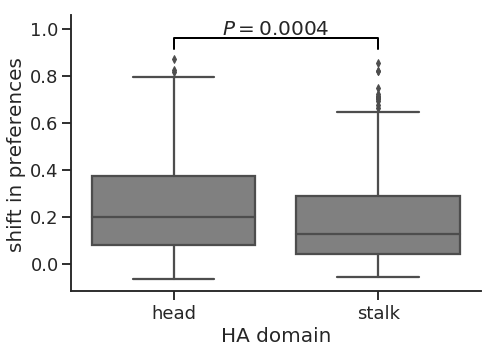

In [44]:
for i, row in prefsdist.iterrows():
    if int(i) in range(59,279):
        prefsdist.set_value(i, 'domain', 'head')
    else:
        prefsdist.set_value(i, 'domain', 'stalk')

# Now plot the shifts in preferences for the two HA domains
sns.set_style('white')
sns.set_style('ticks')
(fig, ax) = plt.subplots(figsize=(7,5))
sns.boxplot(x='domain', 
            y='RMSDcorrected', 
            data=prefsdist, 
            order = ['head', 'stalk'],
            color='gray')

plt.ylabel('shift in preferences', fontsize=20)
plt.xlabel('HA domain', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Calculate significance
p = scipy.stats.mannwhitneyu(
        prefsdist.loc[prefsdist['domain'] == 'head']['RMSDcorrected'], 
        prefsdist.loc[prefsdist['domain'] == 'stalk']['RMSDcorrected']
        )[1]
(x1, x2) = (0, 1)
yextend = 1.05
y = prefsdist.RMSDcorrected.max() * yextend
plt.plot([x1, x1, x2, x2], [y, yextend * y, yextend * y, y], c='black', lw=2)
plt.text((x1 + x2) / 2, y * yextend, '$P = {0:.4f}$'.format(p), 
         ha='center', va='bottom', size=20)
ax.set_ylim(top=y*(yextend**3))

sns.despine()
plt.tight_layout()
# plt.savefig('{0}/HAdomains_vs_shifts.pdf'.format(prefsdistdir), format='pdf')
plt.show()

As we can see from the plot above, the preferences in the stalk domain tend to be less shifted than in the head domain.
This makes sense in light of the fact that the stalk domain is more conserved in sequence across HA subtypes, while the head domain tends to be more variable.

Next, based on a multiple sequence alignment of all 18 HA subtypes, we found 94 sites to be absolutely conserved across all the subtypes, so we will look at the distribution of distances for these conserved sites.

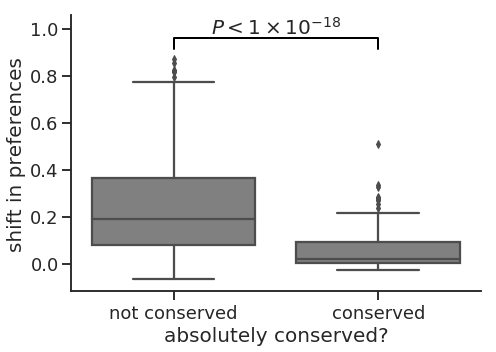

In [45]:
abs_conserved_sites = [s.strip() for s in (open(
        './data/abs_conserved_sites.txt', 'r')).readlines()]

for i, row in prefsdist.iterrows():
    if str(i+1) in abs_conserved_sites:
        prefsdist.set_value(i, 'abs_conserved', 'conserved')
    else:
        prefsdist.set_value(i, 'abs_conserved', 'not conserved')

# Now plot the shifts in preferences for the two classes
sns.set_style('white')
sns.set_style('ticks')
(fig, ax) = plt.subplots(figsize=(7,5))
sns.boxplot(x='abs_conserved', 
            y='RMSDcorrected', 
            data=prefsdist,
            color='gray')

plt.ylabel('shift in preferences', fontsize=20)
plt.xlabel('absolutely conserved?', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Calculate significance
p = scipy.stats.mannwhitneyu(
        prefsdist.loc[prefsdist['abs_conserved'] == 'conserved']['RMSDcorrected'], 
        prefsdist.loc[prefsdist['abs_conserved'] == 'not conserved']['RMSDcorrected']
        )[1]
(x1, x2) = (0, 1)
yextend = 1.05
y = prefsdist.RMSDcorrected.max() * yextend
plt.plot([x1, x1, x2, x2], [y, yextend * y, yextend * y, y], c='black', lw=2)
plt.text((x1 + x2) / 2, y * yextend, r'$P < 1 \times 10^{-18}$', 
         ha='center', va='bottom', size=20)
ax.set_ylim(top=y*(yextend**3))

sns.despine()
plt.tight_layout()
# plt.savefig('{0}/Conserved_vs_shifts.pdf'.format(prefsdistdir), format='pdf')
plt.show()

These absolutely conserved sites are significantly less shifted than sites that are variable across HA subtypes. Presumably these sites are under consistent functional constraint across all HA's.

There have also been structurally defined differences in the rotation and upward translation of the globular head relative to the stalk domain for the clade containing H1, H2, H5 and H6 compared to the clade containing H3, H4, and H14. 
We will now examine shifts at sites that are conserved at different amino-acid identities between these two clades.

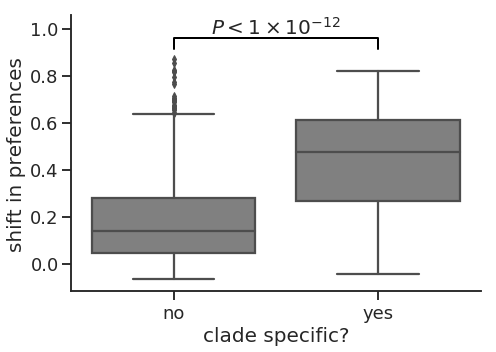

In [46]:
clade_specific_sites = [s.strip() for s in 
        open('./data/clade_specific_sites.txt', 'r').readlines()]

for i, row in prefsdist.iterrows():
    if str(i+1) in clade_specific_sites:
        prefsdist.set_value(i, 'clade_specific', 'yes')
    else:
        prefsdist.set_value(i, 'clade_specific', 'no')

# Now plot the shifts in preferences for the two classes
sns.set_style('white')
sns.set_style('ticks')
(fig, ax) = plt.subplots(figsize=(7,5))
sns.boxplot(x='clade_specific', 
            y='RMSDcorrected', 
            data=prefsdist,
            color='gray')

plt.ylabel('shift in preferences', fontsize=20)
plt.xlabel('clade specific?', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Calculate significance
p = scipy.stats.mannwhitneyu(
        prefsdist.loc[prefsdist['clade_specific'] == 'yes']['RMSDcorrected'], 
        prefsdist.loc[prefsdist['clade_specific'] == 'no']['RMSDcorrected']
        )[1]
(x1, x2) = (0, 1)
yextend = 1.05
y = prefsdist.RMSDcorrected.max() * yextend
plt.plot([x1, x1, x2, x2], [y, yextend * y, yextend * y, y], c='black', lw=2)
plt.text((x1 + x2) / 2, y * yextend, r'$P < 1 \times 10^{-12}$', 
         ha='center', va='bottom', size=20)
ax.set_ylim(top=y*(yextend**3))

sns.despine()
plt.tight_layout()
# plt.savefig('{0}/clade_specific_shifts.pdf'.format(prefsdistdir), format='pdf')
plt.show()

The clade-specific sites are significantly more shifted than other sites.
Some of these shifted sites may be involved in the observed clade-specific differences in structure.

## Compare the entropies between the head and stalk domains for H1 and H3

In this section, we will examine the differences in entropies between the head and stalk domains for H1 and H3.
We have a `dssp` file for an H3 structure (PDB ID `4O5N`) and for an H1 structure (PDB ID `1RVX`).
We will use the `dssp` module of `dms_tools2` to compute the **relative solvent accessibility** of each residue.

In [47]:
# Read in DSSP files
H3_dssp_file = './data/4O5N_trimer.dssp'
H1_dssp_file = './data/1RVX_trimer_sequentialnumbering.dssp'

Now we are going to calculate RSA for each site using the `dssp` module of `dms_tools2`.

In [48]:
H3_HA1dssp = dms_tools2.dssp.processDSSP('./data/4O5N_trimer.dssp', chain = 'A')
H3_HA2dssp = dms_tools2.dssp.processDSSP('./data/4O5N_trimer.dssp', chain = 'B')

H3_HA1dssp['site'] = H3_HA1dssp.site + 16
H3_HA2dssp['site'] = H3_HA2dssp.site + 345

H3_dssp = pd.concat([H3_HA1dssp, H3_HA2dssp], ignore_index=True)

In [49]:
H3_entropydf = entropy_seqnum_prefsdf[['site', 'entropy']]

In [50]:
H3df = H3_dssp.merge(H3_entropydf, how='inner', on='site')

In [51]:
H1_dssp = dms_tools2.dssp.processDSSP('./data/1RVX_trimer_sequentialnumbering.dssp', chain = 'A')

In [52]:
WSN_entropy_prefsdf = pd.read_csv('./data/WSN_avgprefs_rescaled_seqnumbering.csv')

H1_entropydf = WSN_entropy_prefsdf[['site', 'entropy']]

In [53]:
H1df = H1_dssp.merge(H1_entropydf, how='inner', on='site')

Now we are going to define different RSA cutoffs to use. Although a cutoff of `0.2` is commonly used to define surface-exposed residues, we are going to try lower and higher cutoffs.

In [54]:
RSA_cutoffs = [0.1, 0.2, 0.3]

HA_dfs = {'H1': H1df, 'H3': H3df}
HA_domain_sites = {'H1': (59, 291), 'H3': (68, 293)}

In [55]:
RSA_entropy_data = []
for RSA in RSA_cutoffs:
    for key in HA_dfs:
        h_df = HA_dfs[key]
        s1, s2 = HA_domain_sites[key]
        stalk_resis = list(range(1,s1)) + list(range(s2+1,566))
        head_entropies = [(key, 'head', RSA, e) for e in h_df.loc[(h_df['RSA'] >= RSA) & (h_df['site'] > s1) & (h_df['site'] < s2), 'entropy']]
        stalk_entropies = [(key, 'stalk', RSA, e) for e in h_df.loc[(h_df['RSA'] >= RSA) & (h_df['site'].isin(stalk_resis)), 'entropy']]
        RSA_entropy_data.append(head_entropies)
        RSA_entropy_data.append(stalk_entropies)

In [56]:
RSA_entropy_data = [t for sublist in RSA_entropy_data for t in sublist]

In [57]:
RSA_entropy_df = pd.DataFrame.from_records(RSA_entropy_data, columns = ['HA', 'domain', 'RSA', 'entropy'])

Here we plot boxplots of the entropy of sites in the head and stalk domain of H1 or H3 that meet the defined RSA cutoff.
For each plot, the H1 entropies are the right two boxplots, and the H3 entropies are the left two boxplots. Sites in the head domain are in blue, and sites in the stalk domain are in green.
For all RSA cutoffs, the head domain exhibits higher entropy than the stalk domain for H1. However, the stalk domain shows higher entropies than the head domain for H3. This was true for all RSA cutoffs.
Note that we can only make comparisons **within** a given HA variant, and not across H1 and H3. 

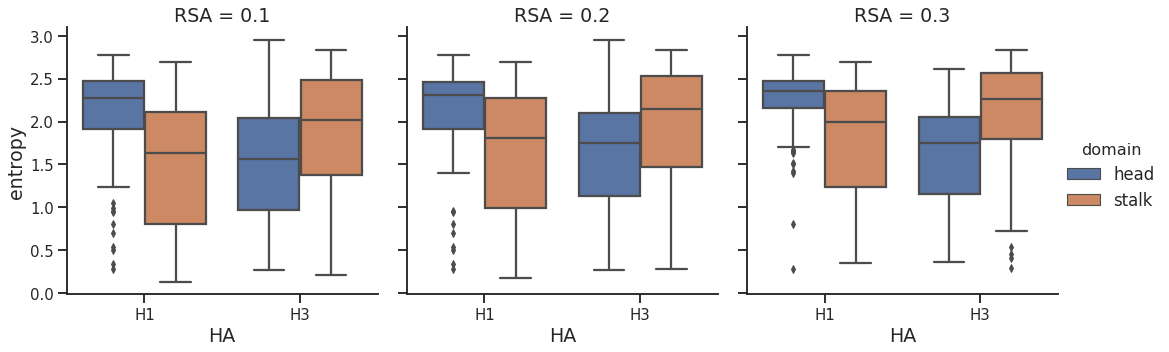

In [58]:
g = sns.factorplot(x='HA', y='entropy', hue='domain', data=RSA_entropy_df, col='RSA', col_wrap=3, kind='box')

plt.savefig('{0}/head_stalk_muttolerances.pdf'.format(plotsdir), format='pdf')
plt.show()